### Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',150)

### Reading the data

In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Shape of the dataframe

In [3]:
lead.shape

(9240, 37)

### Dataframe Information

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Treating incorrect datatype

In [5]:
# 'Converted' is a binary categorical variable but with datatype as 'int64'
lead['Converted'] = lead['Converted'].astype('category')

In [6]:
lead['Converted'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

### Checking for the missing values

#### A few categorical features have a label - 'Select', which is the default option of selecting the value of a feature and this means a lead has not selected any value; and hence we are good to treat this as a missing value

In [7]:
# Replacing 'Select' with NaN value
lead.replace({'Select' : np.nan},inplace=True)

In [8]:
# Validating whether all the 'Select' values got replaced or not
res = lead.isin(['Select']).any().any()
print(res)

False


In [9]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [10]:
# Dropping the columns where the missing value percentage is greater than 45
max_null_percentage = 45
lead = lead.loc[:, ((lead.isnull().sum() * 100 / len(lead)) < max_null_percentage)]
lead.shape

(9240, 30)

In [11]:
# Let us analyse the 'Country' column

lead['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Germany                  0.059006
Canada                   0.059006
South Africa             0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Sweden                   0.044254
Italy                    0.029503
Belgium                  0.029503
Bangladesh               0.029503
Netherlands              0.029503
Philippines              0.029503
Uganda                   0.029503
China                    0.029503
Ghana                    0.029503
Asia/Pacific Region      0.029503
Tanzania                 0.014751
Denmark       

In [12]:
lead.drop(['Country'],axis=1, inplace=True)

In [13]:
# Now let us treat 'City'

lead['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [14]:
# Replacing all the missing values for 'City' with 'Other Cities'

lead['City'].fillna('Other Cities',inplace=True)
lead['City'].value_counts(normalize=True)*100

Other Cities                   47.132035
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [15]:
# 'Specialization' has around 36.5% of missing values.

lead['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [16]:
lead['Specialization'].fillna('No Specialization',inplace=True)
lead['Specialization'].value_counts(normalize=True)*100

No Specialization                    36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [17]:
# The column 'Tags' has a little over 36% missing values.

lead['Tags'].nunique()

26

In [18]:
# Dropping the column 'Tags'

lead.drop(['Tags'],axis=1,inplace=True)
lead.shape

(9240, 28)

In [19]:
# Missing Values for 'What matters most to you in choosing a course'
lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
# Dropping the column 'What matters most to you in choosing a course'

lead.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)
lead.shape

(9240, 27)

In [21]:
# Missing Values for 'What is your current occupation'
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [22]:
lead['What is your current occupation'].fillna('Unknown',inplace=True)
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [23]:
# Let us again check the percentage of missing values in the dataset

round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Last Notable Activity                       0.00
What is your current occupation             0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Specialization                              0.00
Search                                      0.00
A free copy of Mastering The Interview      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [24]:
lead = lead.dropna(axis=0, subset=['TotalVisits','Page Views Per Visit','Last Activity','Lead Source'])

In [25]:
# Let us re-check the percentage of missing values in the dataset

round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

Last Notable Activity                       0.0
What is your current occupation             0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
A free copy of Mastering The Interview      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [26]:
lead.shape #checking shape again

(9074, 27)

### Incorrect Label Treatment for the categorical columns

In [27]:
columns = lead.dtypes[lead.dtypes == 'object'].index.values
for col in columns : 
    print('Levels in ',col,' are ' , lead[col].unique(),'\n\n')

Levels in  Prospect ID  are  ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'] 


Levels in  Lead Origin  are  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'] 


Levels in  Lead Source  are  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 


Levels in  Do Not Email  are  ['No' 'Yes'] 


Levels in  Do Not Call  are  ['No' 'Yes'] 


Levels in  Last Activity  are  ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Ha

In [28]:
# Replacing 'google' with 'Google' in 'Lead Source'
lead['Lead Source'] = lead['Lead Source'].str.replace('google','Google')

In [29]:
# Dropping columns having only one label
col_label_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                 'I agree to pay the amount through cheque']
lead.drop(columns=col_label_drop,axis=1,inplace=True)

In [30]:
lead.shape

(9074, 22)

In [31]:
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [32]:
lead['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Form Submitted on Website        0.011020
Email Received                   0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Approached upfront               0.011020
Name: Last Notable Activity, dtype: float64

In [33]:
# Dropping the column - 'Last Notable Activity'

lead.drop(columns = ['Last Notable Activity'], inplace=True)

In [34]:
lead.shape

(9074, 21)

In [35]:
lead['Newspaper'].value_counts(normalize=True)*100

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64

In [36]:
lead['Newspaper Article'].value_counts(normalize=True)*100

No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64

In [37]:
# Dropping the column - 'Newspaper Article'

lead.drop(columns = ['Newspaper Article'], inplace=True)

In [38]:
lead.shape

(9074, 20)

In [39]:
# Let us check the labels for 'Lead Origin'

lead['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

In [40]:
# Labeling those lead origins having very low lead counts as 'Others' 

lead_origin = lead['Lead Origin'].value_counts(normalize=True)
low_lead_origin = lead_origin[lead_origin < 0.07].index

lead['Lead Origin'].replace(low_lead_origin,'Others',inplace=True)
lead['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Others                      6.733524
Name: Lead Origin, dtype: float64

In [41]:
# Let us check the labels for 'Lead Source'

lead['Lead Source'].value_counts(normalize=True)*100

Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
Click2call            0.044082
Social Media          0.022041
Live Chat             0.022041
Press_Release         0.022041
blog                  0.011020
youtubechannel        0.011020
Pay per Click Ads     0.011020
testone               0.011020
WeLearn               0.011020
welearnblog_Home      0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [42]:
lead_source = lead['Lead Source'].value_counts(normalize=True)
low_lead_source = lead_source[lead_source < 0.1].index   

lead['Lead Source'].replace(low_lead_source,'Others',inplace=True)
lead['Lead Source'].value_counts(normalize=True)*100

Google            31.661891
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Others             8.276394
Name: Lead Source, dtype: float64

In [43]:
# Checking the labels for 'Last Activity'

lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [44]:
lead_activity = lead['Last Activity'].value_counts(normalize=True)
low_lead_activity = lead_activity[lead_activity < 0.1].index    

lead['Last Activity'].replace(low_lead_activity,'Others',inplace=True)
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.822350
SMS Sent                   29.931673
Others                     21.534053
Olark Chat Conversation    10.711924
Name: Last Activity, dtype: float64

In [45]:
# Checking the labels for 'Specialization'

lead['Specialization'].value_counts(normalize=True)*100

No Specialization                    36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [46]:
lead_spec = lead['Specialization'].value_counts(normalize=True)
low_lead_spec = lead_spec[lead_spec < 0.05].index               

lead['Specialization'].replace(low_lead_spec,'Others',inplace=True)
lead['Specialization'].value_counts(normalize=True)*100

No Specialization            36.169275
Others                       29.468812
Finance Management           10.568658
Human Resource Management     9.224157
Marketing Management          9.069870
Operations Management         5.499229
Name: Specialization, dtype: float64

### Outlier Analysis

In [47]:
# Checking for the outliers for the continuous variables at 25%, 50%, 75%, 90%, 95% and 99%

lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [48]:
# Let us cap the outliers at the 99th percentile

cap1 = lead['TotalVisits'].quantile(0.99)
cap2 = lead['Total Time Spent on Website'].quantile(0.99)
cap3 = lead['Page Views Per Visit'].quantile(0.99)

cond1 = lead['TotalVisits'] > cap1
cond2 = lead['Total Time Spent on Website'] > cap2
cond3 = lead['Page Views Per Visit'] > cap3

lead.loc[cond1,'TotalVisits' ] = cap1
lead.loc[cond1,'Total Time Spent on Website' ] = cap2
lead.loc[cond1,'Page Views Per Visit' ] = cap3

In [49]:
# Re-checking for the outliers for the continuous variables at 25%, 50%, 75%, 90%, 95% and 99%

lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.343178,493.724818,2.405464
std,3.252302,557.575905,2.147697
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,942.000000,3.330000
90%,7.000000,1396.700000,5.000000
95%,10.000000,1594.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [50]:
lead.shape

(9074, 20)

#### Total % of records retained = (Total no. of records after data cleaning / Total no. of records in the original data) * 100
                               = (9074 / 9240) * 100
                               = 98.2 %

### Checking the balancing nature of the data

In [51]:
lead['Converted'].value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

In [52]:
# Dividing the dataset w.r.t. successful or unsuccessful convertion of leads
conv = lead[lead['Converted']==1]
unconv = lead[lead['Converted']==0]

### Analysis of the features

In [53]:
def plot_bar(column_name, title_name, df1=lead, df2=conv, figsize=(7,4), kind='bar', normalize_df_appl=False, k=1):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    (df1[column_name].value_counts(normalize=normalize_df_appl)*k).plot(kind=kind)
    plt.title('Total Leads by {0}'.format(title_name), fontsize=12)
    
    plt.subplot(1,2,2)
    (df2[column_name].value_counts(normalize=True)*100).plot(kind=kind)
    plt.title('Converted by {0} (%)'.format(title_name), fontsize=12)
    
    plt.show()

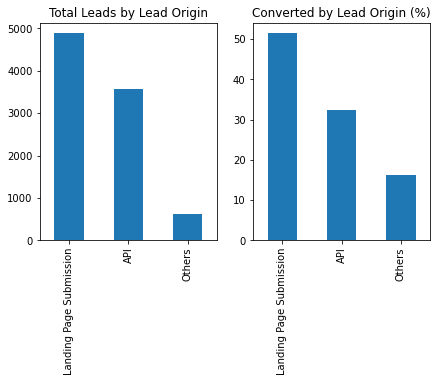

In [54]:
# Univariate Analysis for 'Lead Origin'

plot_bar('Lead Origin','Lead Origin')

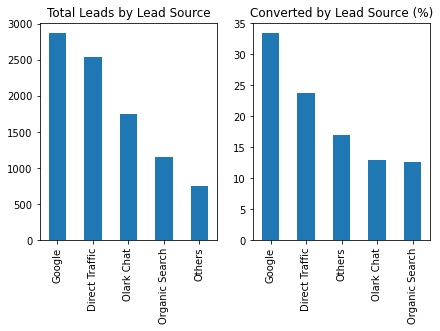

In [55]:
# Univariate Analysis for 'Lead Source'

plot_bar('Lead Source','Lead Source')

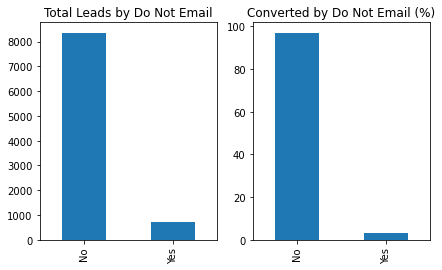

In [56]:
# Univariate Analysis for 'Do Not Email'

plot_bar('Do Not Email','Do Not Email')

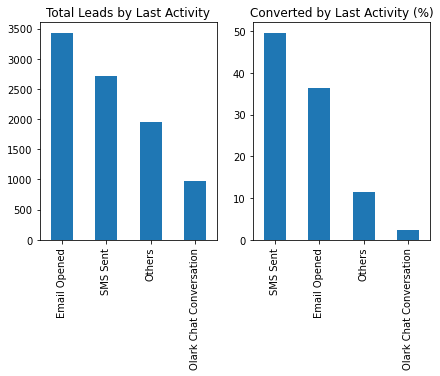

In [57]:
# Univariate Analysis for 'Last Activity'

plot_bar('Last Activity','Last Activity')

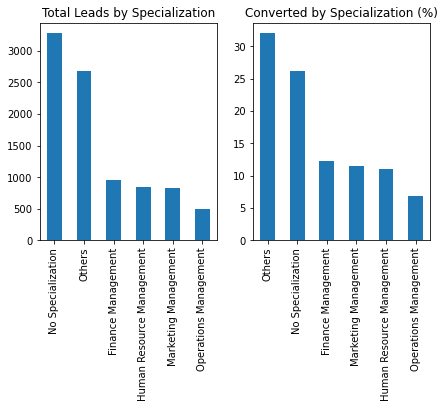

In [58]:
# Univariate Analysis for 'Specialization'

plot_bar('Specialization','Specialization')

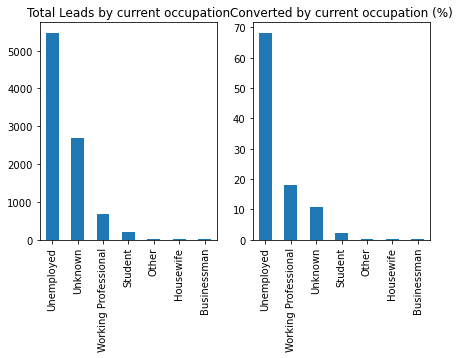

In [59]:
# Univariate Analysis for 'What is your current occupation'

plot_bar('What is your current occupation','current occupation')

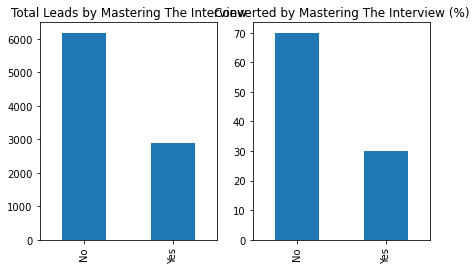

In [60]:
# Univariate Analysis for 'A free copy of Mastering The Interview'

plot_bar('A free copy of Mastering The Interview','Mastering The Interview')

In [61]:
# Defining function for continuous variable univariate analysis using disribution plot
def plot_distplot(column_name, title_name):
    plt.figure(figsize=(15,5))
    plt.title('{0} - All leads vs Converted'.format(title_name), fontsize=12)
    sns.distplot(lead[column_name],hist=False,label='All leads')
    sns.distplot(conv[column_name],hist=False,label='Converted')
    plt.show()

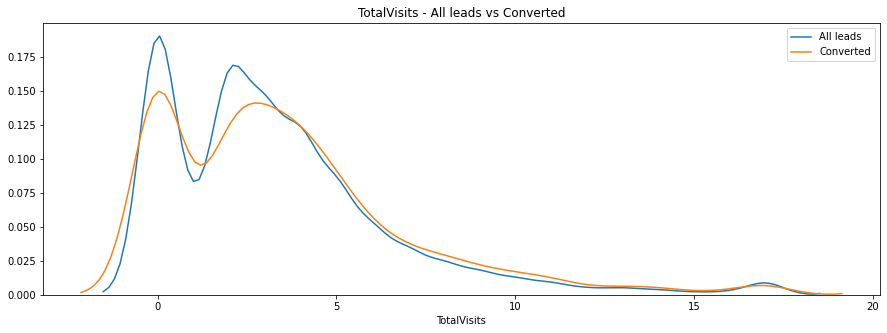

In [62]:
# Univariate Analysis for 'TotalVisits'
plot_distplot('TotalVisits','TotalVisits')

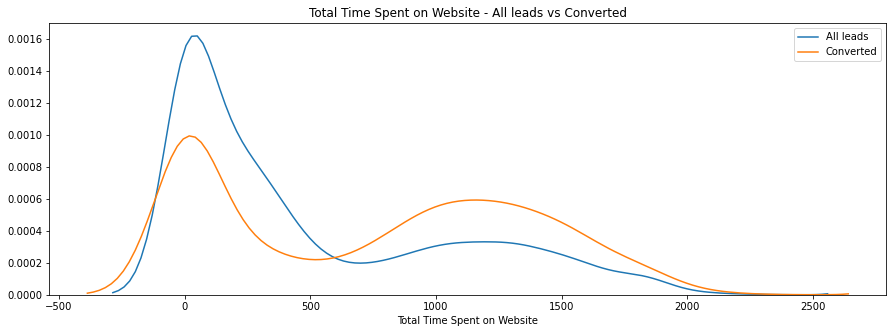

In [63]:
# Univariate Analysis for 'Total Time Spent on Website'
plot_distplot('Total Time Spent on Website','Total Time Spent on Website')

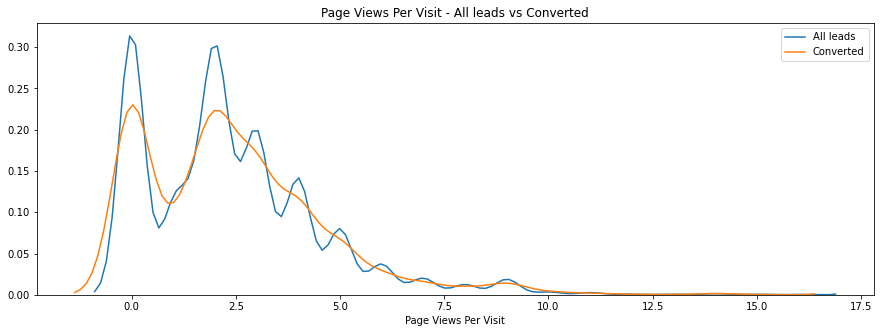

In [64]:
# Univariate Analysis for 'Page Views Per Visit '
plot_distplot('Page Views Per Visit','Page Views Per Visit')

## Data Preparation

### Variable Mapping & Creating Dummy Variables

In [65]:
# Let us check once more the labels of all the categorical features

columns = lead.dtypes[lead.dtypes == 'object'].index.values
for col in columns : 
    print('Levels in ',col,' are ' , lead[col].unique(),'\n\n')

Levels in  Prospect ID  are  ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'] 


Levels in  Lead Origin  are  ['API' 'Landing Page Submission' 'Others'] 


Levels in  Lead Source  are  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Others'] 


Levels in  Do Not Email  are  ['No' 'Yes'] 


Levels in  Do Not Call  are  ['No' 'Yes'] 


Levels in  Last Activity  are  ['Others' 'Email Opened' 'Olark Chat Conversation' 'SMS Sent'] 


Levels in  Specialization  are  ['No Specialization' 'Others' 'Finance Management'
 'Human Resource Management' 'Marketing Management'
 'Operations Management'] 


Levels in  What is your current occupation  are  ['Unemployed' 'Student' 'Unknown' 'Working Professional' 'Businessman'
 'Other' 'Housewife'] 


Levels in  Search  are  ['No' 'Yes'] 


Levels in  X

In [66]:
# Mapping the binary categorical variables(yes/no) to 1/0

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [67]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Others,No Specialization,Unemployed,0,0,0,0,0,Other Cities,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,No Specialization,Unemployed,0,0,0,0,0,Other Cities,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Others,Student,0,0,0,0,0,Mumbai,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Others,Others,Unemployed,0,0,0,0,0,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Others,No Specialization,Unemployed,0,0,0,0,0,Mumbai,0


In [68]:
# Creating dummy variables for the remaining categorical features and removing the 'Others' category since it is 
# not very intuitive from model understanding perspective & adding them to the original dataframe

dummy1 = pd.get_dummies(lead['Lead Origin'],prefix='Origin')      
dummy1 = dummy1.drop(columns=['Origin_Others'])
lead = pd.concat([lead,dummy1], axis=1)

dummy2 = pd.get_dummies(lead['Lead Source'],prefix='Source')
dummy2 = dummy2.drop(columns='Source_Others')
lead = pd.concat([lead,dummy2], axis=1)

dummy3 = pd.get_dummies(lead['Last Activity'],prefix='Activity')
dummy3 = dummy3.drop(columns='Activity_Others')
lead = pd.concat([lead,dummy3], axis=1)

dummy4 = pd.get_dummies(lead['Specialization'],prefix='Spec')
dummy4 = dummy4.drop(columns='Spec_Others')
lead = pd.concat([lead,dummy4], axis=1)

dummy5 = pd.get_dummies(lead['What is your current occupation'],drop_first=True,prefix='Occupation')
lead = pd.concat([lead,dummy5], axis=1)

dummy6 = pd.get_dummies(lead['City'],drop_first=True,prefix='City')
lead = pd.concat([lead,dummy6], axis=1)

In [69]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Origin_API,Origin_Landing Page Submission,Source_Direct Traffic,Source_Google,Source_Olark Chat,Source_Organic Search,Activity_Email Opened,Activity_Olark Chat Conversation,Activity_SMS Sent,Spec_Finance Management,Spec_Human Resource Management,Spec_Marketing Management,Spec_No Specialization,Spec_Operations Management,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Others,No Specialization,Unemployed,0,0,0,0,0,Other Cities,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,No Specialization,Unemployed,0,0,0,0,0,Other Cities,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Others,Student,0,0,0,0,0,Mumbai,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Others,Others,Unemployed,0,0,0,0,0,Mumbai,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Others,No Specialization,Unemployed,0,0,0,0,0,Mumbai,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
# Dropping the features whose dummy variables have been created

lead = lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City'],1)

In [71]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Prospect ID                             9074 non-null   object  
 1   Lead Number                             9074 non-null   int64   
 2   Do Not Email                            9074 non-null   int64   
 3   Do Not Call                             9074 non-null   int64   
 4   Converted                               9074 non-null   category
 5   TotalVisits                             9074 non-null   float64 
 6   Total Time Spent on Website             9074 non-null   float64 
 7   Page Views Per Visit                    9074 non-null   float64 
 8   Search                                  9074 non-null   int64   
 9   X Education Forums                      9074 non-null   int64   
 10  Newspaper                               9074 non

In [72]:
lead.shape

(9074, 39)

### Correlation

In [73]:
# Top Correlations
def correlation(dataframe) : 
    cor0=dataframe.corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [74]:
#Correlations for Converted Leads 

convertedCondition= lead['Converted']==1
correlation(lead[convertedCondition])[1:30:2].style.hide_index()

VAR1,VAR2,CORR
TotalVisits,Page Views Per Visit,0.750000
Activity_Email Opened,Activity_SMS Sent,0.750000
Origin_Landing Page Submission,Origin_API,0.710000
Occupation_Working Professional,Occupation_Unemployed,0.690000
Spec_No Specialization,City_Other Cities,0.630000
Spec_No Specialization,Origin_Landing Page Submission,0.600000
City_Other Cities,Origin_Landing Page Submission,0.600000
Source_Direct Traffic,A free copy of Mastering The Interview,0.590000
Origin_API,Source_Olark Chat,0.560000
Spec_No Specialization,Origin_API,0.550000


In [75]:
#Correlations for Unconverted Leads 

unconvertedCondition= lead['Converted']==0
correlation(lead[unconvertedCondition])[1:30:2].style.hide_index()

VAR1,VAR2,CORR
Origin_API,Origin_Landing Page Submission,0.980000
Occupation_Unemployed,Occupation_Unknown,0.930000
Origin_Landing Page Submission,Spec_No Specialization,0.870000
Origin_API,Spec_No Specialization,0.860000
Spec_No Specialization,City_Other Cities,0.790000
Origin_API,City_Other Cities,0.780000
City_Other Cities,Origin_API,0.780000
Page Views Per Visit,TotalVisits,0.780000
X Education Forums,Through Recommendations,0.710000
Origin_API,Source_Olark Chat,0.620000


In [76]:
# Dividing the dataset into 2 seperate dataframes - one with 'Prospect ID' and 'Lead Number', to be used for the eventual 
# lead scoring purpose, and another without those 2 features for model building purpose

lead_org = lead.copy()
lead_org = lead_org.drop(lead_org.iloc[:,2:],axis=1) 
lead = lead.drop(['Prospect ID','Lead Number'],axis=1)

### Test-Train Split

In [77]:
X = lead
y = lead.pop('Converted')

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

### Feature Scaling

In [78]:
scaler = StandardScaler()

# fitting and transforming train set
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

### Feature Selction Using RFE

In [79]:
len(X_train.columns)

36

In [80]:
logreg = LogisticRegression()

In [81]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Search', False, 22),
 ('X Education Forums', False, 4),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 18),
 ('A free copy of Mastering The Interview', False, 10),
 ('Origin_API', True, 1),
 ('Origin_Landing Page Submission', True, 1),
 ('Source_Direct Traffic', False, 5),
 ('Source_Google', False, 7),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 6),
 ('Activity_Email Opened', True, 1),
 ('Activity_Olark Chat Conversation', True, 1),
 ('Activity_SMS Sent', True, 1),
 ('Spec_Finance Management', False, 17),
 ('Spec_Human Resource Management', False, 21),
 ('Spec_Marketing Management', False, 8),
 ('Spec_No Specialization', True, 1),
 ('Spec_Operations Management', False, 19),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 14),
 ('

In [83]:
# top 15 Columns selected by rfe

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Origin_API', 'Origin_Landing Page Submission', 'Source_Olark Chat',
       'Activity_Email Opened', 'Activity_Olark Chat Conversation',
       'Activity_SMS Sent', 'Spec_No Specialization', 'Occupation_Housewife',
       'Occupation_Unemployed', 'Occupation_Unknown',
       'Occupation_Working Professional', 'City_Tier II Cities'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1

In [84]:
# Creating the first dataframe model with RFE selected variables
X_train_1 = X_train[col]

In [85]:
# Adding a constant variable
X_train_1 = sm.add_constant(X_train_1)

In [86]:
# Running the logistic model

lgm = sm.GLM(y_train,X_train_1,family = sm.families.Binomial()).fit()

In [87]:
# Summary of the new model
print(lgm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.7
Date:                Mon, 26 Oct 2020   Deviance:                       5203.5
Time:                        23:36:47   Pearson chi2:                 6.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [88]:
# Dropping the const variable

X_train_1_ = X_train_1.drop(['const'], axis=1)

In [89]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_1_
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,9.88
4,Origin_Landing Page Submission,7.93
3,Origin_API,7.59
12,Occupation_Unknown,6.03
9,Spec_No Specialization,4.32
6,Activity_Email Opened,2.88
8,Activity_SMS Sent,2.51
5,Source_Olark Chat,2.32
7,Activity_Olark Chat Conversation,1.85
13,Occupation_Working Professional,1.85


We will be following the below rule to eliminate the features one by one, as per the priorities mentioned by the following sequence:-

* We will first check the summary and VIF
* If a variable has got high p-value(>0.05) as well as high VIF(>5), we need to drop that first
* If a variable has got high p-value(>0.05) but low VIF(<5), then we need to drop such
* Still if we have a variable with low p-value(<0.05) but high VIF(>5), we need to drop such at the very end

#### Model 2

In [90]:
# Rebuilding the model without 'Occupation_Unemployed'  

X_train_2 = X_train_1.drop(['const','Occupation_Unemployed'], axis=1)

In [91]:
# Adding a constant variable
X_train_2 = sm.add_constant(X_train_2)

In [92]:
# Running the logistic model

lgm = sm.GLM(y_train,X_train_2,family = sm.families.Binomial()).fit()

In [93]:
# Summary of the new model
print(lgm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.2
Date:                Mon, 26 Oct 2020   Deviance:                       5204.5
Time:                        23:36:48   Pearson chi2:                 6.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [94]:
# Dropping the const variable

X_train_2_ = X_train_2.drop(['const'], axis=1)

In [95]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_2_
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Origin_API,5.28
9,Spec_No Specialization,4.04
4,Origin_Landing Page Submission,3.07
6,Activity_Email Opened,2.51
5,Source_Olark Chat,2.30
8,Activity_SMS Sent,2.10
7,Activity_Olark Chat Conversation,1.79
11,Occupation_Unknown,1.62
1,Total Time Spent on Website,1.28
0,Do Not Email,1.21


#### Model 3

In [96]:
# Rebuilding the model without 'Occupation_Housewife'

X_train_3 = X_train_2.drop(['const','Occupation_Housewife'], axis=1)

In [97]:
# Adding a constant variable
X_train_3 = sm.add_constant(X_train_3)

In [98]:
# Running the logistic model

lgm = sm.GLM(y_train,X_train_3,family = sm.families.Binomial()).fit()

In [99]:
# Summary of the new model
print(lgm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.1
Date:                Mon, 26 Oct 2020   Deviance:                       5212.3
Time:                        23:36:49   Pearson chi2:                 6.27e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [100]:
# Dropping the const variable

X_train_3_ = X_train_3.drop(['const'], axis=1)

In [101]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_3_
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Origin_API,5.28
9,Spec_No Specialization,4.04
4,Origin_Landing Page Submission,3.07
6,Activity_Email Opened,2.51
5,Source_Olark Chat,2.30
8,Activity_SMS Sent,2.10
7,Activity_Olark Chat Conversation,1.79
10,Occupation_Unknown,1.62
1,Total Time Spent on Website,1.28
0,Do Not Email,1.21


#### Model 4

In [102]:
# Rebuilding the model without 'Newspaper'

X_train_4 = X_train_3.drop(['const','Newspaper'], axis=1)

In [103]:
# Adding a constant variable
X_train_4 = sm.add_constant(X_train_4)

In [104]:
# Running the logistic model

lgm = sm.GLM(y_train,X_train_4,family = sm.families.Binomial()).fit()

In [105]:
# Summary of the new model
print(lgm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.9
Date:                Mon, 26 Oct 2020   Deviance:                       5215.7
Time:                        23:36:50   Pearson chi2:                 6.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [106]:
# Dropping the const variable

X_train_4_ = X_train_4.drop(['const'], axis=1)

In [107]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_4_
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_API,5.28
8,Spec_No Specialization,4.04
3,Origin_Landing Page Submission,3.07
5,Activity_Email Opened,2.51
4,Source_Olark Chat,2.29
7,Activity_SMS Sent,2.10
6,Activity_Olark Chat Conversation,1.79
9,Occupation_Unknown,1.62
1,Total Time Spent on Website,1.28
0,Do Not Email,1.21


#### Model 5

In [108]:
# Rebuilding the model without 'City_Tier II Cities'

X_train_5 = X_train_4.drop(['const','City_Tier II Cities'], axis=1)

In [109]:
# Adding a constant variable
X_train_5 = sm.add_constant(X_train_5)

In [110]:
# Running the logistic model

lgm = sm.GLM(y_train,X_train_5,family = sm.families.Binomial()).fit()

In [111]:
# Summary of the new model
print(lgm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.8
Date:                Mon, 26 Oct 2020   Deviance:                       5217.6
Time:                        23:36:51   Pearson chi2:                 6.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [112]:
# Dropping the const variable

X_train_5_ = X_train_5.drop(['const'], axis=1)

In [113]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_5_
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_API,5.28
8,Spec_No Specialization,4.04
3,Origin_Landing Page Submission,3.05
5,Activity_Email Opened,2.51
4,Source_Olark Chat,2.29
7,Activity_SMS Sent,2.10
6,Activity_Olark Chat Conversation,1.79
9,Occupation_Unknown,1.62
1,Total Time Spent on Website,1.28
0,Do Not Email,1.21


#### Model 6

In [114]:
# Rebuilding the model without 'Origin_API'

X_train_6 = X_train_5.drop(['const','Origin_API'], axis=1)

In [115]:
# Adding a constant variable
X_train_6 = sm.add_constant(X_train_6)

In [116]:
# Running the logistic model

lgm = sm.GLM(y_train,X_train_6,family = sm.families.Binomial()).fit()

In [117]:
# Summary of the new model
print(lgm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.8
Date:                Mon, 26 Oct 2020   Deviance:                       5573.5
Time:                        23:36:52   Pearson chi2:                 5.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [118]:
# Dropping the const variable

X_train_6_ = X_train_6.drop(['const'], axis=1)

In [119]:
# Calculating the VIFs for the new model

vif = pd.DataFrame()
X = X_train_6_
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_Landing Page Submission,2.65
7,Spec_No Specialization,2.61
4,Activity_Email Opened,2.21
3,Source_Olark Chat,2.02
6,Activity_SMS Sent,1.95
5,Activity_Olark Chat Conversation,1.71
8,Occupation_Unknown,1.60
1,Total Time Spent on Website,1.20
0,Do Not Email,1.19
9,Occupation_Working Professional,1.13


In [120]:
# Final Features

Final_cols = X_train_6.columns.values
Final_col = np.delete(Final_cols,0)   # Removing the 'const' variable for future use
Final_col

array(['Do Not Email', 'Total Time Spent on Website',
       'Origin_Landing Page Submission', 'Source_Olark Chat',
       'Activity_Email Opened', 'Activity_Olark Chat Conversation',
       'Activity_SMS Sent', 'Spec_No Specialization',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype=object)

### Prediction

In [121]:
lgm = sm.GLM(y_train,X_train_6,family = sm.families.Binomial()).fit()  #as obtained previously
y_train_pred = lgm.predict(X_train_6)

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
3009,0,0.077178,3009
1012,0,0.105151,1012
9226,0,0.629943,9226
4750,1,0.578273,4750
7987,1,0.883141,7987


In [123]:
# Creating new column 'Lead_Pred' with 1 if Conv_Prob > 0.5 else 0

y_train_pred_final['Lead_Pred'] = y_train_pred_final['Conv_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Lead_Pred
3009,0,0.077178,3009,0
1012,0,0.105151,1012,0
9226,0,0.629943,9226,1
4750,1,0.578273,4750,1
7987,1,0.883141,7987,1


#### Confusion Matrix for Train Set

In [124]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Lead_Pred'])
print(confusion)

[[3356  549]
 [ 748 1698]]


#### Accuracy for Train Model

In [125]:
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Lead_Pred'])
print('Accuracy on Train Data : ', round(100*accuracy,2),'%')

Accuracy on Train Data :  79.58 %


#### Metrics beyond simple accuracy

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*sensitivity,2),'%')
print('Specificity : ',  round(100*specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  69.42 %
Specificity :  85.94 %
False Positive Rate :  14.06 %
Positive Predictive Power :  75.57 %
Negative Predictive Power :  81.77 %


#### Plotting ROC Curve

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conv_Prob'], drop_intermediate = False )

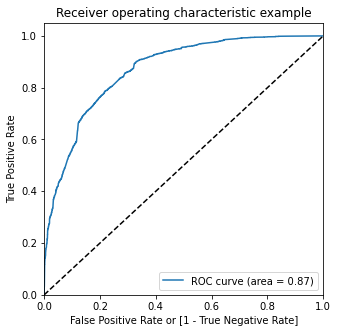

In [129]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conv_Prob'])

#### Finding Optimal Cutoff Point

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conv_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Lead_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.077178,3009,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.105151,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.629943,9226,1,1,1,1,1,1,1,1,0,0,0
4750,1,0.578273,4750,1,1,1,1,1,1,1,0,0,0,0
7987,1,0.883141,7987,1,1,1,1,1,1,1,1,1,1,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.601323  0.981194  0.363380
0.2   0.2  0.724610  0.930499  0.595647
0.3   0.3  0.764919  0.843827  0.715493
0.4   0.4  0.785073  0.771055  0.793854
0.5   0.5  0.795780  0.694195  0.859411
0.6   0.6  0.768383  0.549877  0.905250
0.7   0.7  0.750276  0.438267  0.945711
0.8   0.8  0.725398  0.336877  0.968758
0.9   0.9  0.689655  0.210548  0.989757


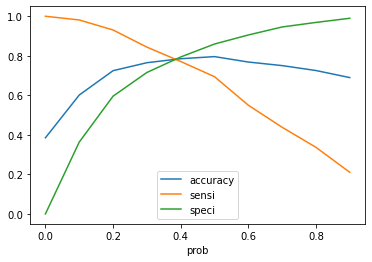

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Conv_Prob'].map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,Lead_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.077178,3009,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.105151,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.629943,9226,1,1,1,1,1,1,1,1,0,0,0,1
4750,1,0.578273,4750,1,1,1,1,1,1,1,0,0,0,0,1
7987,1,0.883141,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [134]:
# Let's check the overall accuracy.
accu = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print('Accuracy on Train set at Optimum Cut Off : ', round(100*accu,2),'%')

Accuracy on Train set at Optimum Cut Off :  78.3 %


In [135]:
# Confusion Matrix for the train set at the Optimum Cut-Off

confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
confusion2

array([[3050,  855],
       [ 523, 1923]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*sensitivity,2),'%')
print('Specificity : ',  round(100*specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  78.62 %
Specificity :  78.1 %
False Positive Rate :  21.9 %
Positive Predictive Power :  69.22 %
Negative Predictive Power :  85.36 %


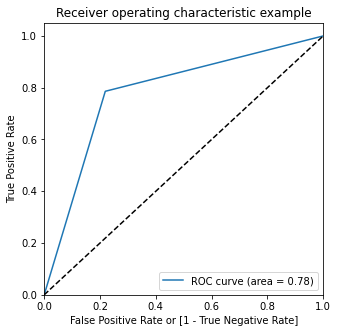

In [137]:
# ROC curve for cut off probability of 0.38
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

#### Precision and Recall

In [138]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['Lead_Pred'])

0.7556742323097463

In [139]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['Lead_Pred'])

0.6941946034341783

#### Precision and Recall tradeoff

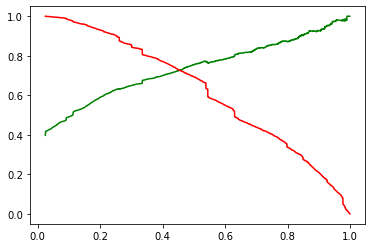

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conv_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the Test Data

In [141]:
# Fit and transform operations are done on the training data but only transform operation will be done on the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [142]:
# Aligning X_test with the final features

X_test = X_test[Final_col]

In [143]:
X_test_sm = sm.add_constant(X_test)

In [144]:
y_test_pred = lgm.predict(X_test_sm)

In [145]:
y_test_pred_final = pd.DataFrame({'Converted':y_test, 'Conv_Prob':y_test_pred, 'LeadID':y_test.index})
y_test_pred_final.head()

,Converted,Conv_Prob,LeadID
3271,0,0.102587,3271
1490,1,0.955541,1490
7936,0,0.090958,7936
4216,1,0.538420,4216
3830,0,0.054411,3830


In [146]:
# Making predictions with optimal cut off = 0.38

y_test_pred_final['final_predicted'] = y_test_pred_final['Conv_Prob'].map(lambda x: 1 if x > 0.38 else 0)

In [147]:
y_test_pred_final.head()

,Converted,Conv_Prob,LeadID,final_predicted
3271,0,0.102587,3271,0
1490,1,0.955541,1490,1
7936,0,0.090958,7936,0
4216,1,0.538420,4216,1
3830,0,0.054411,3830,0


#### Accuracy of the test data

In [148]:
accuracy = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
print('Accuracy on Test Data : ', round(100*accuracy,2),'%')

Accuracy on Test Data :  78.33 %


#### Confusion Matrix for Test Data

In [149]:
confusion3 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
print(confusion3)

[[1365  369]
 [ 221  768]]


In [150]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*sensitivity,2),'%')
print('Specificity : ',  round(100*specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  77.65 %
Specificity :  78.72 %
False Positive Rate :  21.28 %
Positive Predictive Power :  67.55 %
Negative Predictive Power :  86.07 %


#### ROC Curve

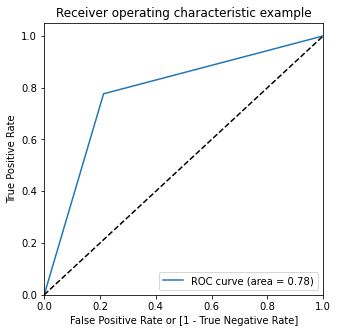

In [151]:
draw_roc(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])

### Lead Scoring

In [152]:
conversionprob = pd.concat([y_test_pred_final['Conv_Prob'],y_train_pred_final['Conv_Prob']],axis=0)
convprob = pd.DataFrame(conversionprob)  #creating a dataframe instead of a pandas series
convprob.reset_index(inplace=True)
convprob.head(3)

,index,Conv_Prob
0,3271,0.102587
1,1490,0.955541
2,7936,0.090958


In [153]:
lead_org.reset_index(inplace=True)
lead_org.head(3)

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727


In [154]:
leads = pd.merge(lead_org,convprob,on='index',how='outer')
leads['Lead Score'] = round(leads['Conv_Prob']*100,2)

In [155]:
leads.sort_values('Lead Score',ascending=False).head(10)

,index,Prospect ID,Lead Number,Conv_Prob,Lead Score
5557,5671,623bc6c9-9184-4437-b38f-d374be49d1a3,606508,0.999225,99.92
2428,2497,e5fb32dd-b3b7-4fbf-972d-c13d2cfc6866,635761,0.998813,99.88
6953,7094,9ec1cafe-b019-498e-b246-7ab06167d72c,595141,0.998763,99.88
4919,5026,698a32b4-24a3-4c35-be41-b7e8710f31bc,611589,0.998775,99.88
7277,7420,2caa32d0-50b7-4d29-b31f-2528b06d7bc8,592625,0.998743,99.87
7074,7215,618b4f84-d8c9-4644-8c39-0b1d4a515e51,594057,0.998200,99.82
1237,1290,fefb0c70-497b-46d2-9dc2-095379258fd9,646330,0.998075,99.81
8765,8928,3de4d942-f83f-407f-a47b-4be6e67e8fbd,581888,0.997737,99.77
2420,2489,f23d4d1d-f52f-4baa-87a4-d68e175aca16,635810,0.997726,99.77
7026,7167,bad2625c-31f7-48da-bb7d-812c08673014,594521,0.997682,99.77


### Interpretation

We have arrived at a very decent model for the the convertion of leads using 10 variables. It can predict the potential leads (leads who eventually get converted) correctly upto 78%. We also have the corresponding lead scores of conversion.

The final relationship between log Odds of Conversion Probability and lead features is    
  
`logOdds(Conversion Probability)` = 0.3199 - 1.2623 * `Do Not Email` + 0.8939 `Total Time Spent on Website` - 1.893 `Origin_Landing Page Submission` + 0.3538 `Source_Olark Chat` + 0.6283 `Activity_Email Opened` - 0.9875 `Activity_Olark Chat Conversation` + 1.8478 `Activity_SMS Sent` - 1.1953 `Spec_No Specialization` - 1.3795 `Occupation_Unknown` + 2.3786 `Occupation_Working Professional`
  
where `Total Time Spent on Website` is standardized to $\mu=0,\sigma=1$


Interpreting the top features affecting Conversion Probability :   
- Leads who are `Working Professionals` have 2.38 times higher log odds of conversion than those with other professions (such as student, housewife, unemployed etc.) combined
- Leads having `SMS Sent` as the last registered activity have 1.8 times higher log odds of conversion than leads having all other last activity (such as email opened, page visited etc.) combined 
- Leads having `Email Opened` as the last registered activity have 0.6 times higher log odds of conversion than leads having all other last activity (such as email marked spam, email link opened, page visited on website etc.) combined 
- Leads who landed on the company’s website through `Olark Chat` as the source, have 0.35 times higher log odds of conversion compared to other lead sources (such as google, facebook etc.) combined
- Leads whose origin was a `Landing Page Submission` have 1.9 times lesser log odds of conversion than other lead sources (such as API etc.) combined
- Leads who have not provided details of their Occupation or in other words, have `Unknown Occupation` have 1.37 times lower log odds of conversion compared to all the leads who have filled their occupation (as either unemployed, working etc.) combined
- Leads who chose not to receive email updates (`Do Not Email`) have 1.26 times lower log odds of conversion compared to leads who would like email updates
- Leads with `No Specialization` have 1.2 times lower log odds of conversion than all leads having some specialization (either Banking, Healthcare, Finance etc.) combined
- Leads with `Olark Chat conversation` as the last activity registered have 0.99 times lower log odds of conversion compared to leads having all other last activity (such as email opened, sms sent etc.) combined
    

### Business Goals/ Action to be taken

* The sales team should target those leads on high priority, who are working professionals, who spend significant amount of time on the website, wishes to communicate over mail and with whom the last method of contact was SMS sent

* The sales team should provide low importance to those leads, who have not mentioned either of their occupation or specialization, and do not wishes to communicate over mail